In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
img_raw = cv2.imread('mandrill_colour.png')

Checking the type of obj the image is saved in as well as the shape

In [8]:
type(img_raw)

numpy.ndarray

In [9]:
img_raw.shape

(288, 288, 3)

There are 288 pixels by 288 pixels and there are 3 layers due to RGB 

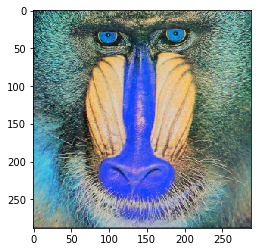

In [10]:
plt.imshow(img_raw)

That happens because OpenCV and matplotlib have different orders of primary colors. Whereas OpenCV reads images in the form of BGR, matplotlib, on the other hand, follows the order of RGB. Thus, when we read a file through OpenCV, we read it as if it contains channels in the order of blue, green and red. However, when we display the image using matplotlib, the red and blue channel gets swapped and hence the blue tinge. 

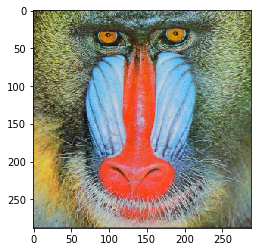

In [12]:
img = cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [13]:
while True:
    cv2.imshow('mandrill',img)

    if cv2.waitKey(1) & 0xFF == 27:
        break


cv2.destroyAllWindows()

The cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues.
The second condition pertains to the pressing of the Escape key on the keyboard. Thus, if 1 millisecond has passed and the escape key is pressed, the loop will break and program stops.


cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.

In [18]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

In [19]:
cv2.imwrite('final_img.png',img)

True

### Operations on images

In [20]:
image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)

Initiating an array of 0s so we expect to see a blank image

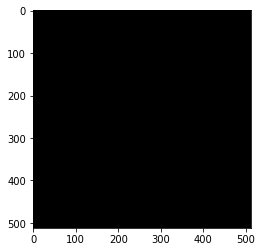

In [21]:
plt.imshow(image_blank)

#### Argument for the drawing of shapes is as followed

cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)

- Image on which shapes are to be drawn
- co-ordinates of the shape to be drawn from Pt1(top left) to Pt2(bottom right)
- Color: The color of the shape that is to be drawn. It is passed as a tuple, eg: (255,0,0). For grayscale, it will be the scale of brightness.
- The thickness of the geometrical figure.

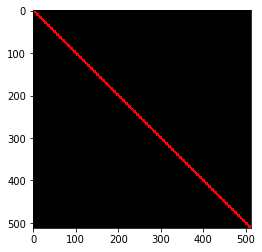

In [23]:
# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5) # line is red becasue 255 pixels on red
plt.imshow(line_red)

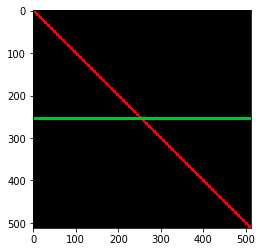

In [35]:
# Draw a horizontal green line with thickness of 5 px
line_y = cv2.line(image_blank,(0,255),(511,255),(0,200,45),5) # li
plt.imshow(line_y)

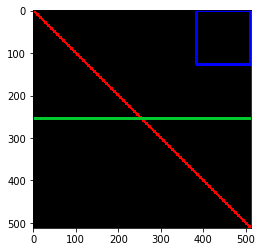

In [38]:
#Draw a blue rectangle with a thickness of 5 px
#rmb that u state the TOP LEFT and the BOTTOM RIGHT coordinate

rectangle= cv2.rectangle(image_blank,(384,0),(510,128),(0,0,255),5)
plt.imshow(rectangle)

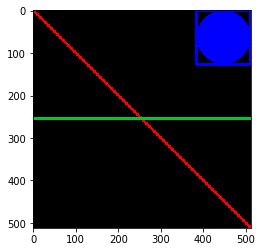

In [41]:
#For a circle, we need to pass its center coordinates and radius value
circle = cv2.circle(image_blank,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(circle)

Writing text onto the image

- Text to be written
- coordinates of the text. The text on an image begins from the bottom left direction.
- Font type and scale.
- Other attributes like color, thickness and line type. Normally the line type that is used is lineType = cv2.LINE_AA.

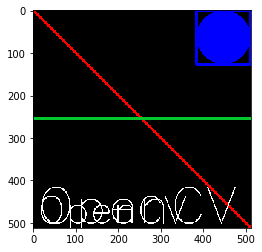

In [43]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(img,'OpenCV',(10,500), font, 3,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

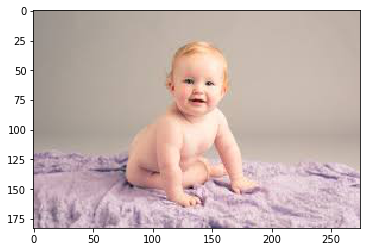

In [88]:
#Loading the image to be tested
test_image = cv2.imread('baby3.jpg')
color = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(color)


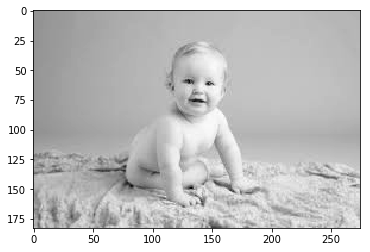

In [89]:
#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [54]:
# writing a function to convert images in cvt to the right colours
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Haar cascade files
OpenCV comes with a lot of pre-trained classifiers. For instance, there are classifiers for smile, eyes, face, etc. These come in the form of xml files and are located in the opencv/data/haarcascades/ folder. However, to make things simple, you can also access them from here. Download the xml files and place them in the data folder in the same working directory as the jupyter notebook.

In [73]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\User\Desktop\personal projects\python\ML\deep learning\haarcascade_frontalface_default.xml')


Face detection
We shall be using the detectMultiscale module of the classifier. This function will return a rectangle with coordinates(x,y,w,h) around the detected face. This function has two important parameters which have to be tuned according to the data.

- scalefactor In a group photo, there may be some faces which are near the camera than others. Naturally, such faces would appear more prominent than the ones behind. This factor compensates for that.

- minNeighbors This parameter specifies the number of neighbors a rectangle should have to be called a face. You can read more about it here.

https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale

Faces_rects gives us the coordinates for the faces found

In [90]:
faces_rects = face_cascade.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 8);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


## Parameters Tuning


Amongst these parameters, you need to pay more attention to four of them:

- scaleFactor – Parameter specifying how much the image size is reduced at each image scale.

    Basically the scale factor is used to create your scale pyramid. More explanation can be found here. In short, as described here, your model has a fixed size defined during training, which is visible in the xml. This means that this size of face is detected in the image if present. However, by rescaling the input image, you can resize a larger face to a smaller one, making it detectable by the algorithm.

    1.05 is a good possible value for this, which means you use a small step for resizing, i.e. reduce size by 5%, you increase the chance of a matching size with the model for detection is found. This also means that the algorithm works slower since it is more thorough. You may increase it to as much as 1.4 for faster detection, with the risk of missing some faces altogether.
    

- minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

    This parameter will affect the quality of the detected faces. Higher value results in less detections but with higher quality. 3~6 is a good value for it.
    

- minSize – Minimum possible object size. Objects smaller than that are ignored.

    This parameter determine how small size you want to detect. You decide it! Usually, [30, 30] is a good start for face detection.
    

- maxSize – Maximum possible object size. Objects bigger than this are ignored.

    This parameter determine how big size you want to detect. Again, you decide it! Usually, you don't need to set it manually, the default value assumes you want to detect without an upper limit on the size of the face.

### Scale Factor

Basically the scale factor is used to create your scale pyramid. More explanation can be found on this link:

https://sites.google.com/site/5kk73gpu2012/assignment/viola-jones-face-detection#TOC-Image-Pyramid

In short. Your model has a fixed size defined during training. This means that this size of face is detected in the image if occuring. However, by rescaling the input image, you can resize a larger face towards a smaller one, making it detectable for the algorithm.

Using a small step for resizing, for example 1.05 which means you reduce size by 5 %, you increase the chance of a matching size with the model for detection is found.

Our next step is to loop over all the coordinates it returned and draw rectangles around them using Open CV. We will be drawing a green rectangle with a thickness of 2

In [91]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

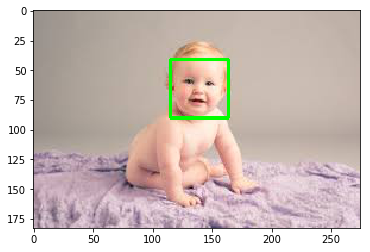

In [92]:
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

Let us now create a generalized function for the entire face detection process.

In [121]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 0, 255), 2)

    return image_copy

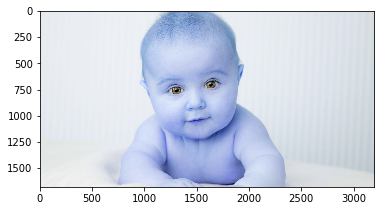

In [124]:
test_img2 = cv2.imread('baby4.jpg')

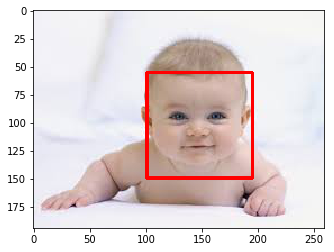

In [125]:
faces = detect_faces(face_cascade,test_img2 )

 #convert to RGB and display image
plt.imshow(convertToRGB(faces))

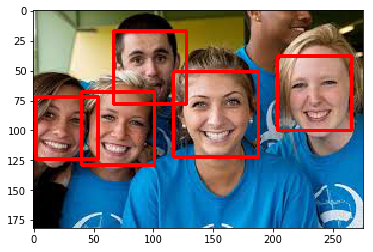

In [122]:
test3 = cv2.imread('grp2.jpg')
faces = detect_faces(face_cascade,test3)
plt.imshow(convertToRGB(faces))